### Problem 4 b)

Create a Robotarium simulation of the system in HW3, Problem 4, for $N \geq 5$ agents for various choices of $\theta$.

Review our conclusion in HW3 problem 4:

* For $\theta<\pi/N$, no matter where the agents are placed initially, they converge to their mass center.
* For $\theta=\pi/N$, no matter where the agents are placed initially, they converge to a cyclic path, centered at their initial mass center.
* For $\theta<\pi/N$, they diverge.

What can be observed in Robotarium simulation:
* For $\theta<\pi/N$, no matter where the agents are placed initially, they converge to their mass center. However, since the simulation avoid collision, all the agents still maintain a small distance.
* For $\theta=\pi/N$, no matter where the agents are placed initially, they converge to a cyclic path, centered at their initial mass center.
* For $\theta<\pi/N$, they diverge but are still confined by the boundary.

### When the agents are placed perfectly on a circle:

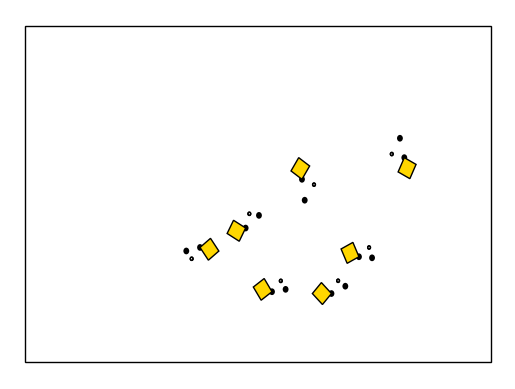

/var/folders/wv/ldyv_46d0mj95h9j3d0dfdcm0000gp/T/ipykernel_49180/3282032749.py:84: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', N)


<Figure size 640x480 with 0 Axes>

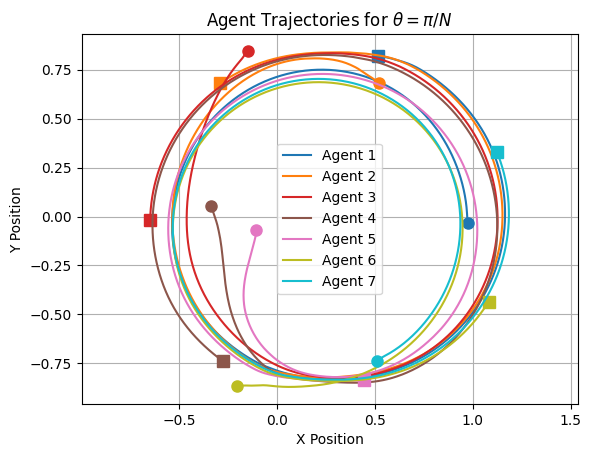

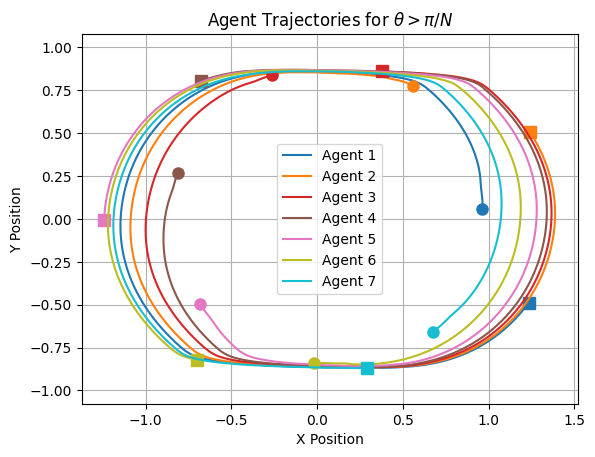

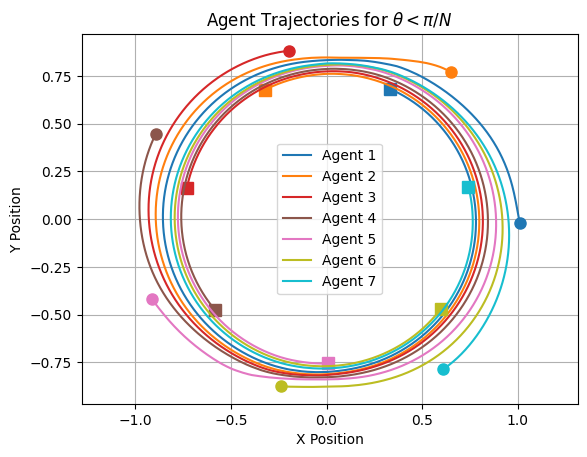

##### DEBUG OUTPUT #####
Your simulation will take approximately 119 real seconds when deployed on the Robotarium. 

	 Simulation had 20405 iteration(s) where the actuator limits of at least one robot were exceeded and thresholded to their maximum rotational velocity.


In [8]:
# Import necessary libraries
import numpy as np
from rps.robotarium import Robotarium
from rps.utilities.barrier_certificates import create_single_integrator_barrier_certificate_with_boundary
from rps.utilities.transformations import create_si_to_uni_mapping
import matplotlib.pyplot as plt

# Define parameters
N = 7  # Number of agents (N >= 5)
iterations = 1000  # Number of iterations for the simulation
dt = 0.01  # Time step size
theta_values = [np.pi / N, np.pi / (0.8 * N), np.pi / (1.2 * N)]  # Different theta values

# Initialize the Robotarium simulator
rbtm = Robotarium(number_of_robots=N, show_figure=True, sim_in_real_time=False)

# Create single integrator to unicycle dynamics mapping and barrier certificates
si_to_uni_dyn, uni_to_si_states = create_si_to_uni_mapping()
si_barrier_cert = create_single_integrator_barrier_certificate_with_boundary()

# Function to initialize agents in perturbed circular positions
def initialize_positions(N):
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False)
    # Introduce small random perturbations
    perturbation_x = 0
    perturbation_y = 0
    initial_positions = np.vstack((np.cos(angles) + perturbation_x, np.sin(angles + perturbation_y)))
    return initial_positions

# Initialize positions
initial_positions = initialize_positions(N)

# Function to run the simulation for a given theta
def run_simulation(theta, initial_positions):
    # Move robots to initial positions
    for _ in range(200):
        x = rbtm.get_poses()
        x_si = uni_to_si_states(x)
        errors = x_si - initial_positions
        norms = np.linalg.norm(errors, axis=0)
        if np.max(norms) < 0.05:
            break
        u = -0.5 * errors
        u = si_barrier_cert(u, x_si)
        dxu = si_to_uni_dyn(u, x)
        rbtm.set_velocities(np.arange(N), dxu)
        rbtm.step()

    # Initialize arrays to record positions
    positions = np.zeros((2, N, iterations))

    # Main simulation loop
    for k in range(iterations):
        x = rbtm.get_poses()
        x_si = uni_to_si_states(x)
        positions[:, :, k] = x_si

        # Compute control inputs
        u = np.zeros((2, N))
        for i in range(N):
            idx_next = (i + 1) % N
            error = x_si[:, idx_next] - x_si[:, i]
            rotation_matrix = np.array([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])
            u[:, i] = rotation_matrix @ error

        # Apply barrier certificates
        u = si_barrier_cert(u, x_si)

        # Convert to unicycle dynamics
        dxu = si_to_uni_dyn(u, x)

        # Set velocities and step
        rbtm.set_velocities(np.arange(N), dxu)
        rbtm.step()

    return positions

# Run simulations for different theta values and plot results
for theta in theta_values:
    positions = run_simulation(theta, initial_positions)

    # Plot trajectories
    plt.figure()
    colors = plt.cm.get_cmap('tab10', N)
    for i in range(N):
        color = colors(i % 10)
        plt.plot(positions[0, i, :], positions[1, i, :], color=color, label=f'Agent {i+1}')
        plt.plot(positions[0, i, 0], positions[1, i, 0], 'o', color=color, markersize=8)
        plt.plot(positions[0, i, -1], positions[1, i, -1], 's', color=color, markersize=8)
    if theta == np.pi / N:
        plt.title(r'Agent Trajectories for $\theta = \pi / N$')
    elif theta > np.pi / N:
        plt.title(r'Agent Trajectories for $\theta > \pi / N$')
    else:
        plt.title(r'Agent Trajectories for $\theta < \pi / N$')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

# Call at the end of the script
rbtm.call_at_scripts_end()


### When the agents are not placed on a circle:

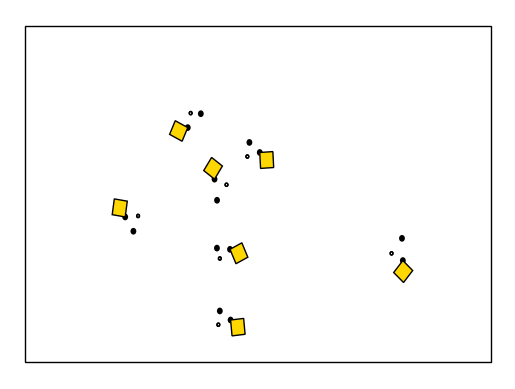

/var/folders/wv/ldyv_46d0mj95h9j3d0dfdcm0000gp/T/ipykernel_49180/1133808519.py:84: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', N)


<Figure size 640x480 with 0 Axes>

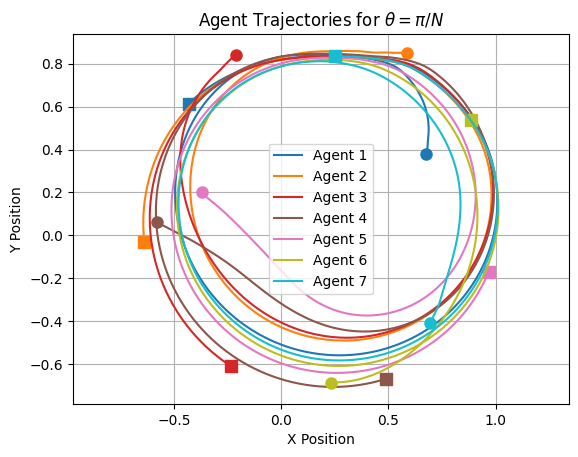

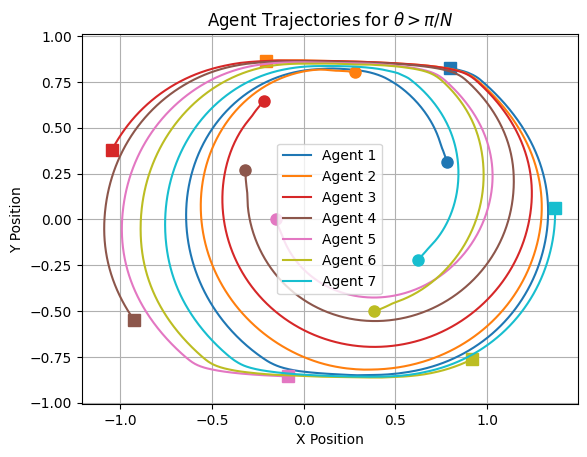

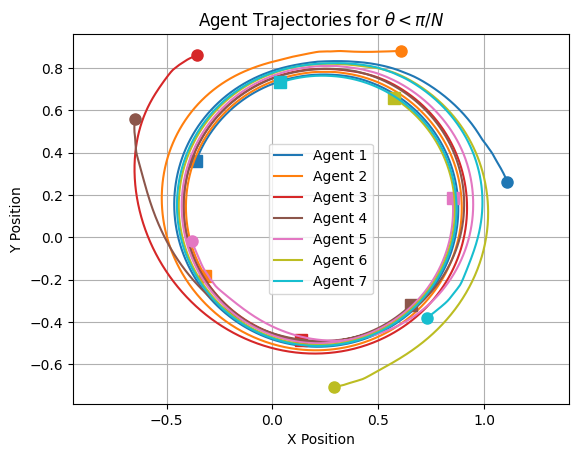

##### DEBUG OUTPUT #####
Your simulation will take approximately 119 real seconds when deployed on the Robotarium. 

	 Simulation had 23954 iteration(s) where the actuator limits of at least one robot were exceeded and thresholded to their maximum rotational velocity.


In [9]:
# Import necessary libraries
import numpy as np
from rps.robotarium import Robotarium
from rps.utilities.barrier_certificates import create_single_integrator_barrier_certificate_with_boundary
from rps.utilities.transformations import create_si_to_uni_mapping
import matplotlib.pyplot as plt

# Define parameters
N = 7  # Number of agents (N >= 5)
iterations = 1000  # Number of iterations for the simulation
dt = 0.01  # Time step size
theta_values = [np.pi / N, np.pi / (0.8 * N), np.pi / (1.2 * N)]  # Different theta values

# Initialize the Robotarium simulator
rbtm = Robotarium(number_of_robots=N, show_figure=True, sim_in_real_time=False)

# Create single integrator to unicycle dynamics mapping and barrier certificates
si_to_uni_dyn, uni_to_si_states = create_si_to_uni_mapping()
si_barrier_cert = create_single_integrator_barrier_certificate_with_boundary()

# Function to initialize agents in perturbed circular positions
def initialize_positions(N):
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False)
    # Introduce small random perturbations
    perturbation_x = 0.5 * np.random.rand(N)
    perturbation_y = 0.5 * np.random.rand(N)
    initial_positions = np.vstack((np.cos(angles) + perturbation_x, np.sin(angles) + perturbation_y))
    return initial_positions

# Initialize positions
initial_positions = initialize_positions(N)

# Function to run the simulation for a given theta
def run_simulation(theta, initial_positions):
    # Move robots to initial positions
    for _ in range(200):
        x = rbtm.get_poses()
        x_si = uni_to_si_states(x)
        errors = x_si - initial_positions
        norms = np.linalg.norm(errors, axis=0)
        if np.max(norms) < 0.05:
            break
        u = -0.5 * errors
        u = si_barrier_cert(u, x_si)
        dxu = si_to_uni_dyn(u, x)
        rbtm.set_velocities(np.arange(N), dxu)
        rbtm.step()

    # Initialize arrays to record positions
    positions = np.zeros((2, N, iterations))

    # Main simulation loop
    for k in range(iterations):
        x = rbtm.get_poses()
        x_si = uni_to_si_states(x)
        positions[:, :, k] = x_si

        # Compute control inputs
        u = np.zeros((2, N))
        for i in range(N):
            idx_next = (i + 1) % N
            error = x_si[:, idx_next] - x_si[:, i]
            rotation_matrix = np.array([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])
            u[:, i] = rotation_matrix @ error

        # Apply barrier certificates
        u = si_barrier_cert(u, x_si)

        # Convert to unicycle dynamics
        dxu = si_to_uni_dyn(u, x)

        # Set velocities and step
        rbtm.set_velocities(np.arange(N), dxu)
        rbtm.step()

    return positions

# Run simulations for different theta values and plot results
for theta in theta_values:
    positions = run_simulation(theta, initial_positions)

    # Plot trajectories
    plt.figure()
    colors = plt.cm.get_cmap('tab10', N)
    for i in range(N):
        color = colors(i % 10)
        plt.plot(positions[0, i, :], positions[1, i, :], color=color, label=f'Agent {i+1}')
        plt.plot(positions[0, i, 0], positions[1, i, 0], 'o', color=color, markersize=8)
        plt.plot(positions[0, i, -1], positions[1, i, -1], 's', color=color, markersize=8)
    if theta == np.pi / N:
        plt.title(r'Agent Trajectories for $\theta = \pi / N$')
    elif theta > np.pi / N:
        plt.title(r'Agent Trajectories for $\theta > \pi / N$')
    else:
        plt.title(r'Agent Trajectories for $\theta < \pi / N$')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

# Call at the end of the script
rbtm.call_at_scripts_end()
